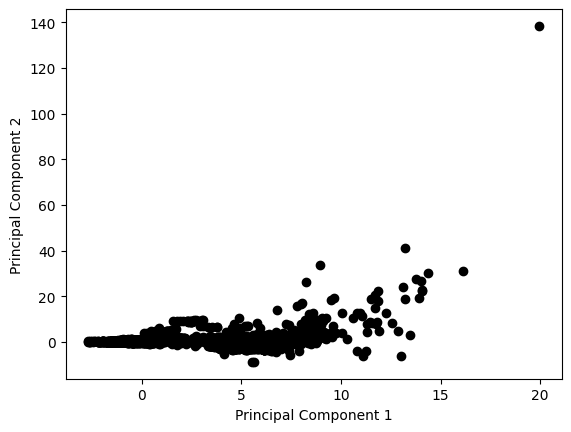

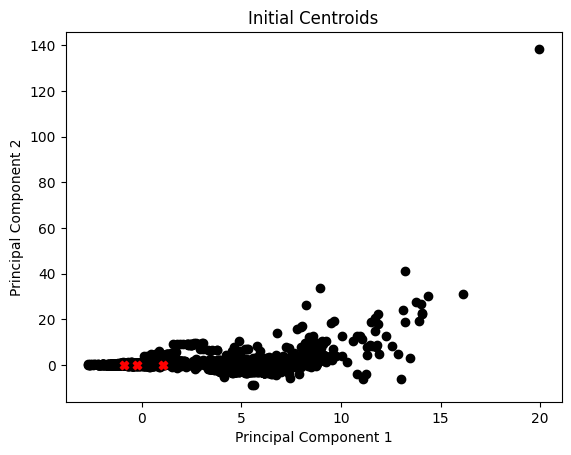

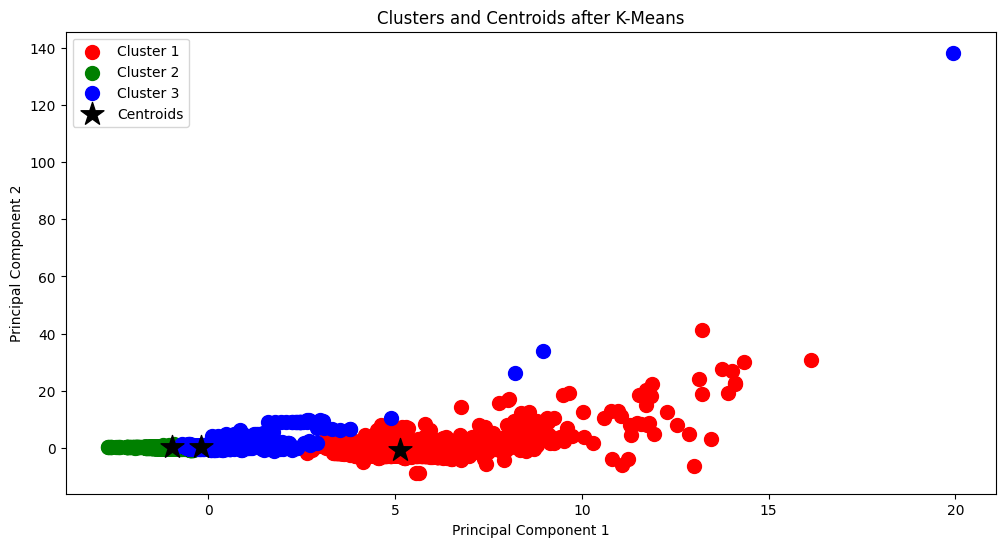

In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('/content/salaries.csv')  # Update the path to your dataset

# Selecting numerical columns for clustering
X_numerical = data[["salary_in_usd", "remote_ratio"]]

# Selecting categorical columns for encoding
X_categorical = data[["experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size"]]

# Applying OneHotEncoder to categorical columns
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, X_categorical.columns)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X_categorical)
X_processed = np.hstack((X_processed.toarray(), X_numerical.values))

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Dimensionality Reduction (optional step, depending on the number of features after encoding)
pca = PCA(n_components=2)  # Adjust based on your dataset
X_pca = pca.fit_transform(X_scaled)

# Visualise data points after PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Choose the number of clusters (k) and select random centroid for each cluster
K = 3  # You can change K based on your clustering needs

# Select random observation as centroids
Centroids = X_pca[np.random.choice(X_pca.shape[0], K, replace=False), :]

# Visualize initial centroids
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='black')
plt.scatter(Centroids[:, 0], Centroids[:, 1], c='red', marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Initial Centroids')
plt.show()

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to assign points to the nearest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for idx, point in enumerate(data):
        closest_centroid = np.argmin([euclidean_distance(point, centroid) for centroid in centroids])
        clusters[closest_centroid].append(idx)
    return clusters

# Function to calculate new centroids
def calculate_centroids(data, clusters):
    new_centroids = np.zeros((len(clusters), data.shape[1]))
    for idx, cluster in enumerate(clusters):
        new_centroids[idx] = np.mean(data[cluster], axis=0)
    return new_centroids

# K-Means algorithm
def k_means(data, K, max_iters=100):
    centroids = data[np.random.choice(data.shape[0], K, replace=False), :]
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        previous_centroids = centroids
        centroids = calculate_centroids(data, clusters)

        # Convergence check (centroids do not change)
        if np.all([euclidean_distance(previous_centroids[i], centroids[i]) == 0 for i in range(K)]):
            break
    return clusters, centroids

# Running K-Means algorithm
clusters, centroids = k_means(X_pca, K)

# Visualizing the results
plt.figure(figsize=(12, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i, cluster in enumerate(clusters):
    plt.scatter(X_pca[cluster, 0], X_pca[cluster, 1], s=100, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='*', label='Centroids')
plt.title('Clusters and Centroids after K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
